tensor([ 218.5400,  211.9099,  437.3553,  391.5303,  649.7098,  111.2262,
         414.6599,  963.2515,  617.0241,  460.5719,  860.9150,  566.5123,
         847.3416,  896.5836,  736.5746,  289.0808,  732.9567,  814.7523,
        1001.2451,  513.4342]) tensor([ 445.2916, -108.7663,  481.7713,  491.5034,  652.5912,  616.7209,
         987.6643,  234.2254,  785.0876,  477.5295,  682.4490,   38.6702,
         474.4768,  241.6129,  421.8403,  561.4464,  594.2955,  775.3087,
         214.3055,  509.3964])


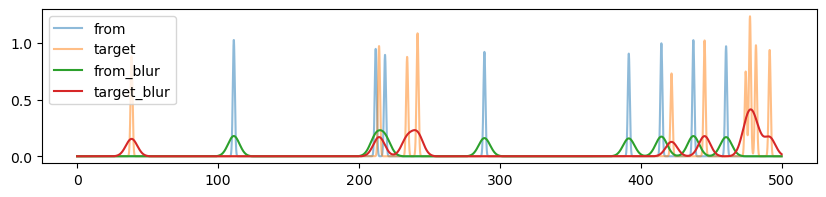

In [8]:
import matplotlib.pyplot as plt
import torch
from torch.nn import functional as F
torch.random.manual_seed(0)

plt.figure(figsize=(10, 2))
canvas_range = 500

x_ticks = torch.arange(0, canvas_range, 0.01, dtype=torch.float32)
gs = lambda miu: torch.exp(-(x_ticks - miu)**2) * (torch.randn(1) * 0.1 + 1)
a_idx = torch.randn(20) * canvas_range/2 + canvas_range
a_ops = torch.randn(20) * 0.3 + 1
a = sum([gs(i) for i in a_idx.tolist()]) 
b_idx = torch.randn(20) * canvas_range/2 + canvas_range
b_ops = torch.randn(20) * 0.3 + 1
b = sum([gs(i) for i in b_idx.tolist()]) 
print(a_idx, b_idx)

normalize = lambda x: (x - x.min()) / (x.max() - x.min())
gaussian_blur = lambda v, r: F.conv1d(
    v.view(1, 1, -1),  # reshape to [batch, channel, length]
    torch.exp(-torch.arange(-3*r, 3*r+1)**2 / (2*r**2)).view(1, 1, -1) / (r * (2*torch.pi)**0.5),  # gaussian kernel
    padding='same'
).view(-1)  # reshape back to original

plt.plot(x_ticks,   a, label='from', alpha=0.5)
plt.plot(x_ticks,   b, label='target', alpha=0.5)
blured_a = gaussian_blur(a, 400)
blured_b = gaussian_blur(b, 400)
plt.plot(x_ticks, blured_a, label='from_blur', alpha=1)
plt.plot(x_ticks, blured_b, label='target_blur', alpha=1)
plt.legend()